In [2]:
import ROOT
import uproot 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BASE_DIR = "/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016preVFP_rebin_2/Nominal/ee/"

In [4]:
w_sym_fileptr = uproot.open(BASE_DIR + "histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP.root")

### Project out the axes

In [5]:
w_sym_fileptr["hrecoVsgen_b1k"].to_hist()

Hist(
  Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'),
  Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'),
  storage=Weight()) # Sum: WeightedSum(value=2.51481e+07, variance=8.63519e+08) (WeightedSum(value=3.0018e+08, variance=1.11288e+10) with flow)

In [6]:
w_sym_fileptr["hrecoVsgen_b1k"].to_hist().project('xaxis')

Hist(Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'), storage=Weight()) # Sum: WeightedSum(value=3.0018e+08, variance=1.11288e+10) (WeightedSum(value=3.0018e+08, variance=1.11288e+10) with flow)

In [7]:
w_sym_fileptr["hrecoVsgen_b1k"].to_hist().project('yaxis')

Hist(Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=2.51481e+07, variance=8.63519e+08) (WeightedSum(value=3.0018e+08, variance=1.11288e+10) with flow)

## Compare bin by bin contents

### Gen 

In [8]:
gen_from_projection = w_sym_fileptr["hrecoVsgen_b1k"].to_hist().project('xaxis').to_numpy()[0]
gen_from_projection

array([12246580.45813995, 12294942.03190458, 12402135.79210285,
       12455741.81045671, 12499812.62457718, 12541935.49184966,
       12582250.06943497, 12610764.04627052, 12595369.1869972 ,
       12606629.20707369, 12605051.52771567, 12649030.85436265,
       12649030.85436265, 12605051.52771567, 12606629.20707369,
       12595369.1869972 , 12610764.04627052, 12582250.06943497,
       12541935.49184966, 12499812.62457718, 12455701.90091462,
       12402175.70164493, 12294942.03190458, 12246501.41287475])

In [9]:
gen_from_histogram = w_sym_fileptr["hgen_b1k"].to_numpy()[0]
gen_from_histogram

array([12526678.37981997, 12467475.38704655, 12509708.80807115,
       12500780.00992491, 12554822.43847001, 12529422.41894266,
       12520745.65948617, 12522418.08045926, 12539411.88138352,
       12509038.02359967, 12526072.41373565, 12492686.52731495,
       12492686.52731495, 12526072.41373565, 12509038.02359967,
       12539411.88138352, 12522418.08045926, 12520707.96976602,
       12529460.10866281, 12554822.43847001, 12500740.10038283,
       12509748.71761324, 12467475.38704655, 12526678.37981997])

In [10]:
gen_from_projection == gen_from_histogram

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [11]:
delta_gen = np.divide((gen_from_projection - gen_from_histogram), gen_from_histogram)
delta_gen = abs(delta_gen) * 100
delta_gen 

array([2.23601112, 1.38386762, 0.85991623, 0.36028311, 0.43815685,
       0.09986951, 0.49122002, 0.70550245, 0.44625144, 0.78016538,
       0.63051778, 1.25148683, 1.25148683, 0.63051778, 0.78016538,
       0.44625144, 0.70550245, 0.49152252, 0.0995684 , 0.43815685,
       0.36028426, 0.85991348, 1.38386762, 2.23664214])

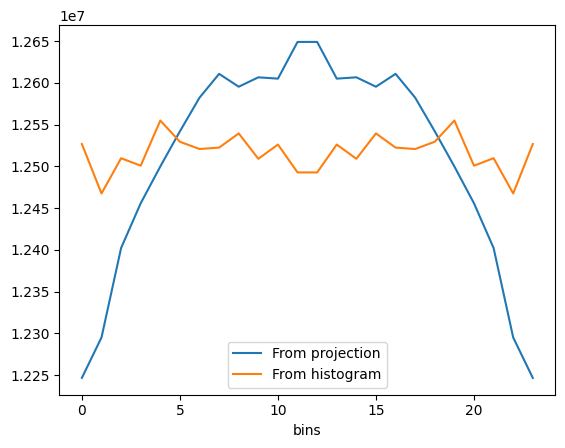

In [12]:
plt.plot(gen_from_projection, label="From projection")
plt.plot(gen_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.94, 1.04)

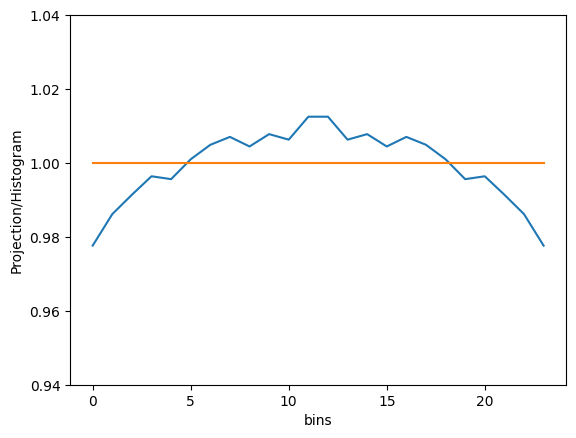

In [13]:
plt.plot(np.divide(gen_from_projection, gen_from_histogram))
plt.plot(np.ones(len(gen_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.94,1.04)

In [14]:
sum(delta_gen)/ len(delta_gen)

0.8069636452576278

### W/o Symmetrization

In [15]:
BASE_DIR = "/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016preVFP/Nominal/ee/"

In [16]:
wo_sym_fileptr = uproot.open(BASE_DIR + "histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP.root")

In [17]:
wo_sym_fileptr["hrecoVsgen_b1k"].to_hist()

Hist(
  Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'),
  Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'),
  storage=Weight()) # Sum: WeightedSum(value=2.51481e+07, variance=1.72704e+09) (WeightedSum(value=3.0018e+08, variance=2.22575e+10) with flow)

In [18]:
wo_sym_fileptr["hrecoVsgen_b1k"].to_hist().project('xaxis')

Hist(Regular(24, 0.5, 24.5, name='xaxis', label='ttbargen'), storage=Weight()) # Sum: WeightedSum(value=3.0018e+08, variance=2.22575e+10) (WeightedSum(value=3.0018e+08, variance=2.22575e+10) with flow)

In [19]:
wo_sym_fileptr["hrecoVsgen_b1k"].to_hist().project('yaxis')

Hist(Regular(48, 0.5, 48.5, name='yaxis', label='ttbarreco'), storage=Weight()) # Sum: WeightedSum(value=2.51481e+07, variance=1.72704e+09) (WeightedSum(value=3.0018e+08, variance=2.22575e+10) with flow)

In [20]:
gen_from_projection = wo_sym_fileptr["hrecoVsgen_b1k"].to_hist().project('xaxis').to_numpy()[0]
gen_from_projection

array([11826465.10667306, 11957805.77367262, 12193688.16360667,
       12210850.34628764, 12391151.15112782, 12425492.74814769,
       12506278.52518249, 12476483.47547817, 12510940.59981659,
       12560788.38667618, 12553865.15853777, 12640470.8933341 ,
       12657590.8153912 , 12656237.89689356, 12652470.02747121,
       12679797.77417782, 12745044.61706287, 12658221.61368746,
       12658378.23555162, 12608474.09802654, 12700633.27462578,
       12610583.42059902, 12632078.29013654, 12666537.71907645])

In [21]:
gen_from_histogram = wo_sym_fileptr["hgen_b1k"].to_numpy()[0]
gen_from_histogram

array([12462420.38617155, 12420382.959413  , 12467212.72411564,
       12419556.75418854, 12563507.79639906, 12506080.04449275,
       12486050.13719845, 12527493.98002308, 12476195.89424418,
       12478666.34029388, 12509570.65302874, 12499244.56659876,
       12486128.48803114, 12542574.17444256, 12539409.70690547,
       12602627.86852286, 12517342.18089543, 12555441.18177389,
       12552764.79339257, 12546137.08054094, 12582003.26566128,
       12552204.89202667, 12514567.8146801 , 12590936.3734684 ])

In [22]:
gen_from_projection == gen_from_histogram

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

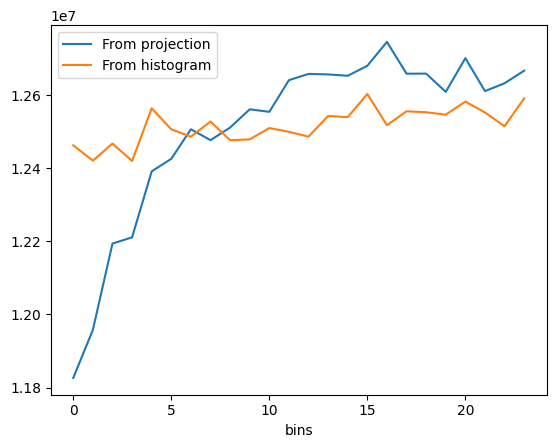

In [23]:
plt.plot(gen_from_projection, label="From projection")
plt.plot(gen_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.94, 1.04)

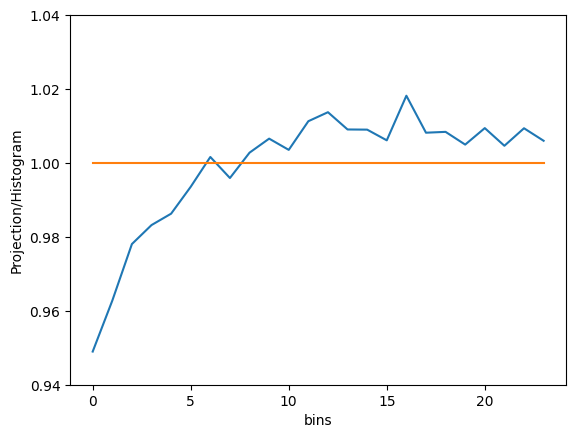

In [24]:
plt.plot(np.divide(gen_from_projection, gen_from_histogram))
plt.plot(np.ones(len(gen_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.94,1.04)

In [27]:
RespMat = wo_sym_fileptr["hrecoVsgen_b1k"].to_hist()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(
/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


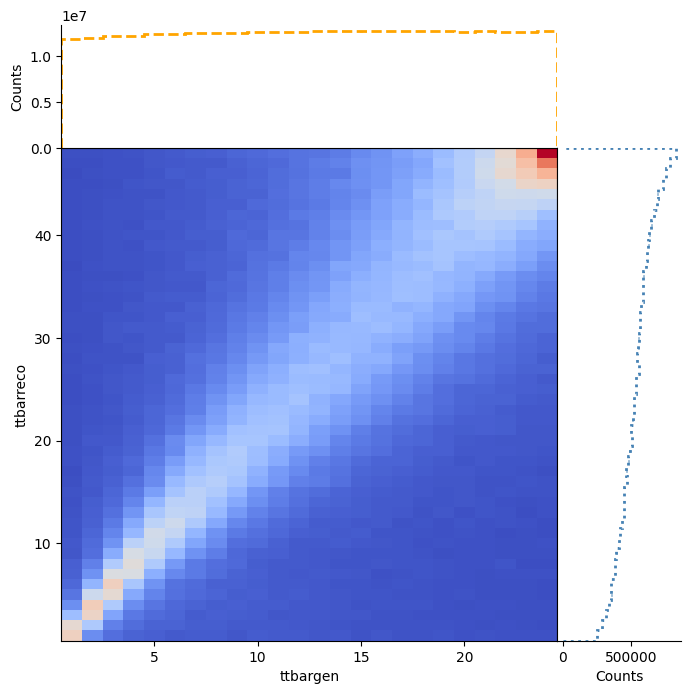

In [28]:
# plot2d_full
plt.figure(figsize=(8, 8))

RespMat.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()